/Users/wuhao/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


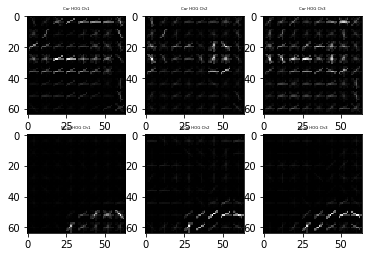

In [10]:
import numpy as np
import pickle
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
%matplotlib inline

#read in all car and non-car images
car_list = glob.glob("./vehicles/**/*.png")
noncar_list = glob.glob("./non-vehicles/**/*.png")
car_img = mpimg.imread(car_list[1000])
noncar_img = mpimg.imread(noncar_list[1000])
'''
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(car_img)
ax1.set_title('Car Image', fontsize=30)
ax2.imshow(noncar_img)
ax2.set_title('Non-car Image', fontsize=30)
'''
def get_hog_features(img,orient=9,pixels=8,cells=2,vis=True,feature_vec=True):   
    if vis:
        hog_features,hog_img = hog(img,orientations=orient,pixels_per_cell=(pixels,pixels),cells_per_block=(cells,cells),visualise=vis,transform_sqrt=True,feature_vector=feature_vec)
        return hog_features, hog_img
    else:
        hog_features = hog(img,orientations=orient,pixels_per_cell=(pixels,pixels),cells_per_block=(cells,cells),visualise=vis,transform_sqrt=True,feature_vector=feature_vec)
        return hog_features

car_YCrCb=cv2.cvtColor(car_img, cv2.COLOR_RGB2YCrCb)  
car_hog_ch1feat,car_hog_ch1img = get_hog_features(car_YCrCb[:,:,0],orient=8,pixels=8,cells=2,vis=True,feature_vec=False)
car_hog_ch2feat,car_hog_ch2img = get_hog_features(car_YCrCb[:,:,1],orient=8,pixels=8,cells=2,vis=True,feature_vec=False)
car_hog_ch3feat,car_hog_ch3img = get_hog_features(car_YCrCb[:,:,2],orient=8,pixels=8,cells=2,vis=True,feature_vec=False)

noncar_YCrCb=cv2.cvtColor(noncar_img, cv2.COLOR_RGB2YCrCb)  
noncar_hog_ch1feat,noncar_hog_ch1img = get_hog_features(noncar_YCrCb[:,:,0],orient=8,pixels=8,cells=2,vis=True,feature_vec=False)
noncar_hog_ch2feat,noncar_hog_ch2img = get_hog_features(noncar_YCrCb[:,:,1],orient=8,pixels=8,cells=2,vis=True,feature_vec=False)
noncar_hog_ch3feat,noncar_hog_ch3img = get_hog_features(noncar_YCrCb[:,:,2],orient=8,pixels=8,cells=2,vis=True,feature_vec=False)

fig = plt.figure()
plt.subplot(231)
plt.imshow(car_hog_ch1img, cmap='gray')
plt.title('Car HOG Ch1',fontsize=4)
plt.subplot(232)
plt.imshow(car_hog_ch2img, cmap='gray')
plt.title('Car HOG Ch2',fontsize=4)
plt.subplot(233)
plt.imshow(car_hog_ch3img, cmap='gray')
plt.title('Car HOG Ch3',fontsize=4)
plt.subplot(234)
plt.imshow(noncar_hog_ch1img, cmap='gray')
plt.title('NCar HOG Ch1',fontsize=4)
plt.subplot(235)
plt.imshow(noncar_hog_ch2img, cmap='gray')
plt.title('NCar HOG Ch2',fontsize=4)
plt.subplot(236)
plt.imshow(noncar_hog_ch3img, cmap='gray')
plt.title('NCar HOG Ch3',fontsize=4)

In [11]:
def bin_spatial(img, size=(32,32)):
    return cv2.resize(img, size).ravel()
    
def color_hist(img, nbins=32, bins_range=(0,256)):
    ch1_hist=np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ch2_hist=np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ch3_hist=np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    hist_features = np.concatenate((ch1_hist[0],ch2_hist[0],ch3_hist[0]))
    return hist_features

def extract_features(images_flist, color_space='RGB',spatial_size=(32,32),hist_bins=32, orient=8,pix_per_cell=8,cell_per_block=2,hog_channel=0,spatial_feat=True,hist_feat=True,hog_feat=True):
    features=[]
    for filename in images_flist:
        file_features = []
        img = mpimg.imread(filename)
        if color_space!='RGB':
            if color_space=='HSV':
                feature_image=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            elif color_space=='LUV':
                feature_image=cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
            elif color_space=='HLS':
                feature_image=cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
            elif color_space=='YUV':
                feature_image=cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
            elif color_space=='YCrCb':
                feature_image=cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
            else:
                print("Please input color space you want to transform to.")
        else:
            feature_image=np.copy(img)
        
        if spatial_feat==True:
            spatial_feature = bin_spatial(feature_image,size=spatial_size)
            file_features.append(spatial_feature)
        
        if hist_feat==True:
            color_feature = color_hist(feature_image, nbins=hist_bins)
            file_features.append(color_feature)
        
        if hog_feat==True:
            if hog_channel=='ALL':
                hog_feature=[]
                for channel in range(feature_image.shape[2]):
                    hog_feature.extend(get_hog_features(feature_image[:,:,channel],orient,pix_per_cell,cell_per_block, vis=False,feature_vec=True))
            else:                
                hog_feature=get_hog_features(feature_image,orient,pix_per_cell,cell_per_block, vis=False,feature_vec=True)
            file_features.append(hog_feature)
        features.append(np.concatenate(file_features))
    return features
car_feat = extract_features(car_list,color_space='RGB',spatial_size=(32,32),hist_bins=32,orient=8,pix_per_cell=8,cell_per_block=2,hog_channel='ALL',spatial_feat=True,hist_feat=True,hog_feat=True)
print(len(car_feat))
noncar_feat = extract_features(noncar_list,color_space='RGB',spatial_size=(32,32),hist_bins=32,orient=8,pix_per_cell=8,cell_per_block=2,hog_channel='ALL',spatial_feat=True,hist_feat=True,hog_feat=True)
features = np.vstack((car_feat,noncar_feat)).astype(np.float64)
labels = np.hstack((np.ones(len(car_list)),np.zeros(len(noncar_list))))
print(len(noncar_feat))
print(features.shape)
print(labels.shape)

/Users/wuhao/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


8792
8968
(17760, 7872)
(17760,)


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC                        
# Fit a per-column scaler
feat_scaler = StandardScaler().fit(features)
# Apply the scaler to X
scaled_features = feat_scaler.transform(features)

rand_state = np.random.randint(0, 100)
train_X,test_X,train_y,test_y = train_test_split(scaled_features,labels,test_size=0.2,random_state=rand_state)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = LinearSVC()
#clf = GridSearchCV(svr, parameters)
svc.fit(train_X,train_y)
print('Test Accuracy of SVC = ', svc.score(test_X, test_y))

(14208, 7872)
(3552, 7872)
(14208,)
(3552,)
Test Accuracy of SVC =  0.98338963964


390
((0, 360), (64, 424))


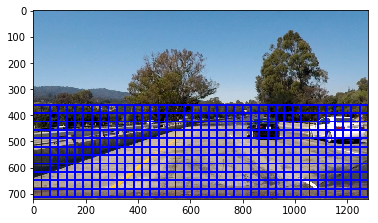

In [18]:
test_img=mpimg.imread('./test_images/test1.jpg')

def draw_boxes(img, bboxes, color=(0,0,255),thick=6):
    img_copy=np.copy(img)
    for bbox in bboxes:
        cv2.rectangle(img_copy,bbox[0],bbox[1],color,thick)
    return img_copy

def slide_window(img,x_start_stop=[None,None],y_start_stop=[None,None],xy_window=(64,64),xy_overlap=(0.5,0.5)):
    if x_start_stop[0]==None:
        x_start_stop[0]=0
    if x_start_stop[1]==None:
        x_start_stop[1]=img.shape[1]
    if y_start_stop[0]==None:
        y_start_stop[0]=0
    if y_start_stop[1]==None:
        y_start_stop[1]=img.shape[0]
    xspan=x_start_stop[1]-x_start_stop[0]
    yspan=y_start_stop[1]-y_start_stop[0]
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    window_list=[]
    for ny in range(ny_windows):
        for nx in range(nx_windows):
            x_start = x_start_stop[0]+nx*nx_pix_per_step
            y_start = y_start_stop[0]+ny*ny_pix_per_step
            x_end = x_start+xy_window[0]
            y_end = y_start+xy_window[1]
            window_list.append(((x_start,y_start),(x_end,y_end)))
    return window_list
windows=slide_window(test_img,x_start_stop=[None,None],y_start_stop=[np.int(test_img.shape[0]/2),np.int(test_img.shape[0])],xy_window=(64,64),xy_overlap=(0.5,0.5))
print(len(windows))
print(windows[0])
test_cpimg=draw_boxes(test_img,windows)
plt.imshow(test_cpimg)

In [19]:
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

In [23]:
# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #print(features.shape)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows
bound_boxes=search_windows(test_img, windows, clf=svc, scaler=feat_scaler, color_space='YCrCb', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=8, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel='ALL', spatial_feat=True, 
                    hist_feat=True, hog_feat=True)

/Users/wuhao/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


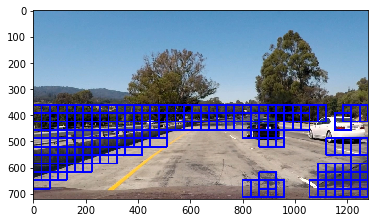

In [24]:
detection_img=draw_boxes(test_img,bound_boxes)
plt.imshow(detection_img)

In [50]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    car_bboxes=[]
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, vis=False,feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, vis=False,feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, vis=False,feature_vec=False)

    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                car_bboxes.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
    return draw_img, car_bboxes

/Users/wuhao/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


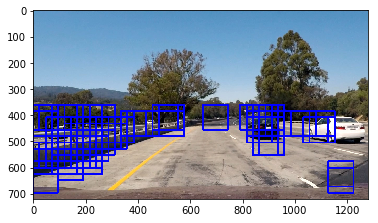

In [51]:
height=test_img.shape[0]
result,car_bound_boxes=find_cars(test_img, ystart=int(height/2), ystop=height, scale=1.5, svc=svc, X_scaler=feat_scaler, orient=8, pix_per_cell=8, cell_per_block=2, spatial_size=(32,32), hist_bins=32)
plt.imshow(result)

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32), 4)


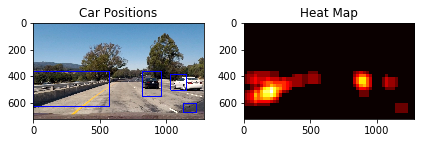

In [52]:
from scipy.ndimage.measurements import label

heat = np.zeros_like(test_img[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Add heat to each box in box list
heat = add_heat(heat,car_bound_boxes)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
print(labels)
draw_img = draw_labeled_bboxes(np.copy(test_img), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()